<a href="https://colab.research.google.com/github/cvitorc/Exemplos-Estatistica-Mestrado/blob/main/TesteT_NaoPareado_Normalidade_Variancia_Iguais_2grupos_Exemplo4_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Verificação do teste T para dois grupos. Um usou APP e outro não.

1o Passo. Verificação da normalidade.
H0 - Os dados seguem uma distribuição normal.

---


H1 - Nao há diferença significativa para indicar que os dados seguem uma distribuição normal.

---


índice de significância de 5%.

---


Para verificaÇão da normalidade, este programa usa o teste de Anderson-Darling.

---



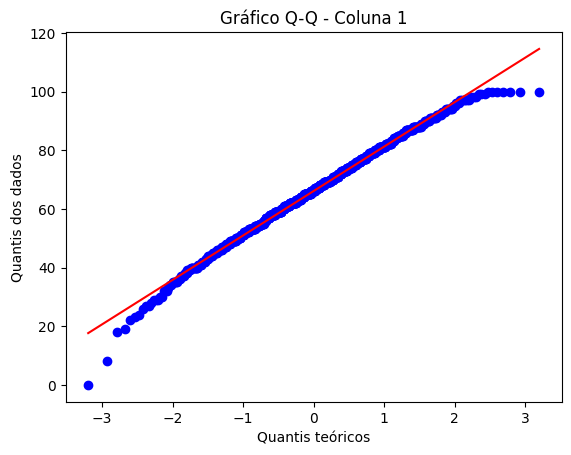

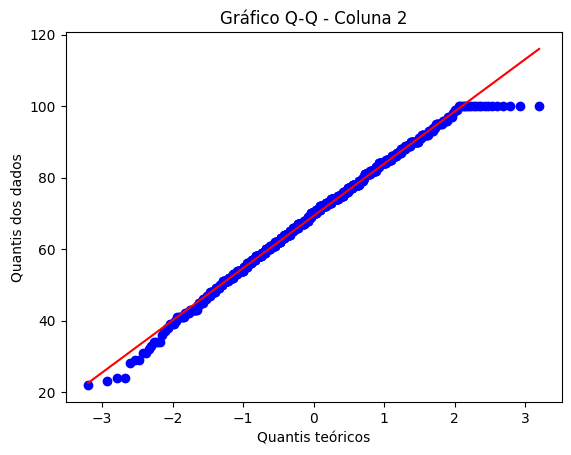

Valor p grupo_sem_app: 0.21599999999999997
Valor p grupo_com_app: 0.21599999999999997
Grupo 1: Os dados seguem uma distribuição normal.
Grupo 2: Os dados seguem uma distribuição normal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from scipy import stats

# Carregue os dados do arquivo Excel com duas colunas
dados_excel = pd.read_excel('Math-reading-1000.xlsx')

# Selecione as duas colunas de dados que você deseja analisar
coluna1 = dados_excel['math score']
coluna2 = dados_excel['reading score']

# Realize o teste de Anderson-Darling nas duas colunas
resultado_coluna1 = stats.anderson(coluna1)
resultado_coluna2 = stats.anderson(coluna2)

# Estatística do teste de Anderson-Darling
estatistica_teste_coluna1 = resultado_coluna1.statistic
estatistica_teste_coluna2 = resultado_coluna2.statistic
valores_críticos_coluna1 = resultado_coluna1.critical_values
valores_críticos_coluna2 = resultado_coluna2.critical_values

# Calcule o valor de p
p_valor1 = 1.0 - valores_críticos_coluna1[valores_críticos_coluna1 > estatistica_teste_coluna1][0]
p_valor2 = 1.0 - valores_críticos_coluna2[valores_críticos_coluna2 > estatistica_teste_coluna2][0]

# Defina um nível de significância (geralmente 0,05) para avaliar o p-valor
nivel_significancia = 0.05

# Crie um gráfico Q-Q comparando os dados com a distribuição normal
stats.probplot(coluna1, dist="norm", plot=plt)

# Adicione rótulos e um título ao gráfico
plt.xlabel("Quantis teóricos")
plt.ylabel("Quantis dos dados")
plt.title("Gráfico Q-Q - Coluna 1")

# Exiba o gráfico
plt.show()

# Crie um gráfico Q-Q comparando os dados com a distribuição normal
stats.probplot(coluna2, dist="norm", plot=plt2)

# Adicione rótulos e um título ao gráfico
plt2.xlabel("Quantis teóricos")
plt2.ylabel("Quantis dos dados")
plt2.title("Gráfico Q-Q - Coluna 2")

# Exiba o gráfico
plt2.show()


# Exibe o resultado do teste

print(f"Valor p grupo_sem_app: {p_valor1}")
print(f"Valor p grupo_com_app: {p_valor2}")

# Verifique se os dados seguem uma distribuição normal
if p_valor1 > nivel_significancia:
    print("Grupo 1: Os dados seguem uma distribuição normal.")
else:
    print("Grupo 1: Os dados não seguem uma distribuição normal.")

# Verifique se os dados seguem uma distribuição normal
if p_valor2 > nivel_significancia:
    print("Grupo 2: Os dados seguem uma distribuição normal.")
else:
    print("Grupo 2: Os dados não seguem uma distribuição normal.")

2o passo: Outra forma de verificar se as variancias sao iguais. Calcule a razão entre a maior variância e a menor variância. Se a relação for menor que 4, pode-se considerar as variâncias iguais.

In [ ]:
import numpy as np
from scipy import stats

# outra forma de verificar se as variancias sao iguais. Razão entre a maior variância e a menor variância

# calculo das variâncias
variancia1 = np.var(coluna1)
variancia2 = np.var(coluna2)

# Calculo valor de F

if variancia1 >= variancia2:
    f_variancia = variancia1 / variancia2
else:
    f_variancia = variancia2 / variancia1


# Verifique se as variâncias são iguais
if f_variancia < 4:
    print("As variâncias dos grupos são estatisticamente iguais")
else:
    print("Há evidências para sugerir que as variâncias dos grupos são diferentes. ")

As variâncias dos grupos são estatisticamente iguais


3o passo: Verificação do Teste T.

---


H0 – As médias dos grupos iguais.


---


H1 – Há diferença significativa entre os grupos

In [ ]:
from scipy import stats

#Teste de Hipóteses (T-test):
t_stat, p_valor = stats.ttest_ind(coluna1, coluna2)

print("Valor p:", p_valor)

# Defina um nível de significância (geralmente 0,05) para avaliar o p-valor
nivel_significancia = 0.05

# Verifique se o valor de P e maior que o nível de significancia
if p_valor > nivel_significancia:
    print("Valor P é maior  que índice de significância. Logo, não rejeitar H0. Assim, podemos afirmar com nível de significância de 5% que não houve diferença significativa entre os grupos.")
else:
    print("Valor P é menor que índice de significância. Logo, rejeitar H0. Assim, podemos afirmar com nível de significância de 5% que houve diferença significativa entre os grupos.")

# calcula as médias dos grupos
media1 = np.mean(coluna1)
media2 = np.mean(coluna2)
print(f"Media grupo 1 : {media1}")
print(f"Media grupo 2 : {media2}")



Valor p: 1.4975631689267988e-06
Valor P é menor que índice de significância. Logo, rejeitar H0. Assim, podemos afirmar com nível de significância de 5% que houve diferença significativa entre os grupos.
Media grupo 1 : 66.089
Media grupo 2 : 69.304
